# 判断是岩石还是矿石
## 实际问题
根据声呐收集的数据及判定的所属分类，构建根据声呐数据，判断分类的模型。
## 问题归类
分类问题：监督学习、分类问题（二分类）
## 数据集说明
声呐数据集：60 个输入变量表示声纳从不同角度返回的强度。这是一个二元分类问题（binary classification problem），该数据集包含了来自声纳信号的实验数据，用于分类任务，判断是矿石（mines）还是岩石（rocks），总共有 208 个观测样本。

## 运行环境


Python 3.11.5  

Name: numpy  
Version: 1.24.3  

Name: pandas  
Version: 2.0.3  

Name: matplotlib  
Version: 3.7.2  

Name: scikit-learn  
Version: 1.3.0 

# 0.整体的显示设置

In [1]:
# 优化
# 1.不显示错误警告
import warnings
warnings.filterwarnings('ignore')

# 2.画图过程中的中文显示
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

# 1.定义问题
题头已做说明。  


# 2.理解数据
## 导入数据
可以读取数据文件，也可以连接数据库

In [2]:
# 导入数据
from pandas import read_csv
filename = r'E:\笔记本电脑文件\2023年5月5日\E盘\study\coding\机器学习python实践\MachineLearningInProjectWithPython-main\2_二分类_声呐数据集判断探测物类型\sonar.all-data.csv'
dataset = read_csv(filename, header=None)
print(dataset)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54   

## 查看数据
查看数据维度，查看数据类型

In [3]:
from pandas import set_option
from matplotlib import pyplot

# 数据维度
print('1.数据维度')
print(dataset.shape)

# 查看数据类型
# set_option('display.max_rows', 500)
print("2.数据类型")
print(dataset.dtypes)

# 查看最初的20条记录
# set_option('display.width', 100)
print("3.查看前20条记录")
print(dataset.head(20))

# 描述性统计信息
# set_option('precision', 3)
print("4.查看统计信息")
print(dataset.describe())

# 数据的分类分布
print(dataset.groupby(60).size())

1.数据维度
(208, 61)
2.数据类型
0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object
3.查看前20条记录
        0       1       2       3       4       5       6       7       8   \
0   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5   0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6   0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7   0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8   0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9   0

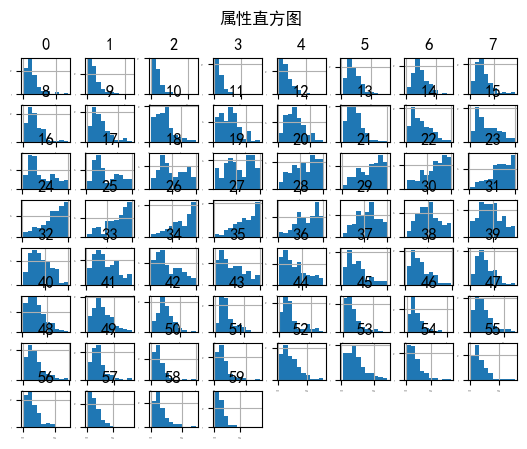

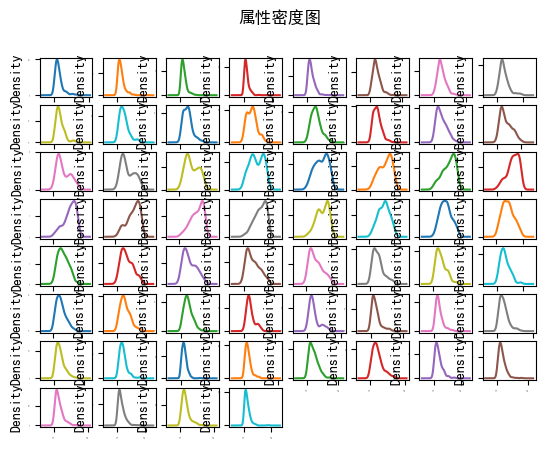

"\n# 关系矩阵图\nfig = pyplot.figure()\nfig.suptitle('关系矩阵图')\nax = fig.add_subplot(111)\ncax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')\nfig.colorbar(cax)\npyplot.show()\n"

In [4]:
# 直方图
dataset.hist(sharex=False, sharey=False,xlabelsize=1, ylabelsize=1)
pyplot.suptitle("属性直方图")
pyplot.show()

# 密度图
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
pyplot.suptitle("属性密度图")
pyplot.show()

"""
# 关系矩阵图
fig = pyplot.figure()
fig.suptitle('关系矩阵图')
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()
"""

# 3.数据准备
现成的数据集，需要做的处理相对简单。  

训练集：训练、验证  
测试集：测试。看看模型的泛化能力

【0.75-0.8】训练、验证；【0.2-0.25】测试  
分开：属性与目标值  

交叉验证：10份中9份训练、1份验证；10次  10折交叉验证，K折交叉验证、留一交叉验证  

# 4.评估算法
构建算法与算法评估准则：6个简单算法的使用  
分类问题，用准确率评分  
使用10折交叉验证  

In [5]:
from sklearn.model_selection import train_test_split
# 分离评估数据集
array = dataset.values
X = array[:, 0:60].astype(float)
Y = array[:, 60]
validation_size = 0.25
seed = 7 # 随机数种子
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

## 使用原始数据做模型

In [6]:
from sklearn.linear_model          import LogisticRegression
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes           import GaussianNB
from sklearn.svm                   import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scoring = 'accuracy'
num_folds = 10

In [7]:
# 评估算法的基准
seed = 7

# 评估算法：使用原始数据 - 原始数据
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()

results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))
    
print('明细结果：')
print(results)

LR : 0.762083 (0.130190)
LDA : 0.794167 (0.077889)
KNN : 0.782500 (0.089283)
CART : 0.628333 (0.116530)
NB : 0.671667 (0.137863)
SVM : 0.761667 (0.084939)
明细结果：
[array([0.875     , 0.6875    , 0.875     , 0.625     , 0.9375    ,
       0.6875    , 0.53333333, 0.93333333, 0.73333333, 0.73333333]), array([0.75      , 0.8125    , 0.875     , 0.8125    , 0.875     ,
       0.75      , 0.73333333, 0.93333333, 0.73333333, 0.66666667]), array([0.6875    , 0.8125    , 0.8125    , 0.75      , 0.9375    ,
       0.625     , 0.73333333, 0.73333333, 0.86666667, 0.86666667]), array([0.625     , 0.5625    , 0.625     , 0.6875    , 0.6875    ,
       0.5625    , 0.53333333, 0.8       , 0.8       , 0.4       ]), array([0.625     , 0.75      , 0.5625    , 0.75      , 0.875     ,
       0.6875    , 0.33333333, 0.73333333, 0.73333333, 0.66666667]), array([0.875     , 0.8125    , 0.75      , 0.6875    , 0.875     ,
       0.75      , 0.6       , 0.8       , 0.8       , 0.66666667])]


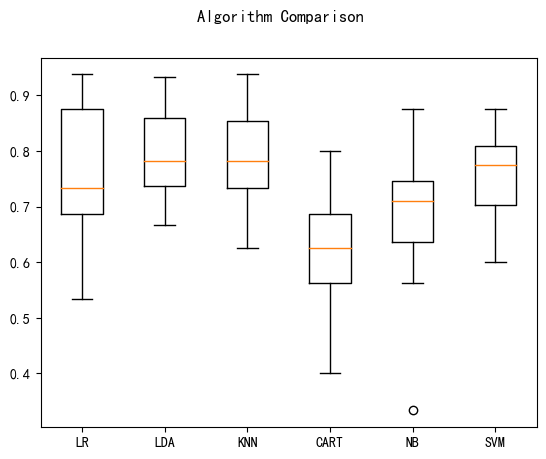

In [8]:
# 评估算法：使用原始数据 - 箱线图
# 准确率图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

## 使用正态化数据做模型

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# 评估算法：使用正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])
pipelines['ScalerLDA'] = Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])
pipelines['ScalerNB'] = Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])

results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))
    
print('明细结果：')
print(results)

ScalerLR : 0.768750 (0.088511)
ScalerLDA : 0.794167 (0.077889)
ScalerKNN : 0.794167 (0.101605)
ScalerCART : 0.589583 (0.100920)
ScalerNB : 0.671667 (0.137863)
ScalerSVM : 0.807917 (0.090397)
明细结果：
[array([0.8125    , 0.75      , 0.75      , 0.75      , 0.9375    ,
       0.6875    , 0.6       , 0.86666667, 0.73333333, 0.8       ]), array([0.75      , 0.8125    , 0.875     , 0.8125    , 0.875     ,
       0.75      , 0.73333333, 0.93333333, 0.73333333, 0.66666667]), array([0.875     , 0.875     , 0.625     , 0.6875    , 1.        ,
       0.8125    , 0.73333333, 0.8       , 0.73333333, 0.8       ]), array([0.625     , 0.4375    , 0.5625    , 0.6875    , 0.6875    ,
       0.5625    , 0.46666667, 0.66666667, 0.73333333, 0.46666667]), array([0.625     , 0.75      , 0.5625    , 0.75      , 0.875     ,
       0.6875    , 0.33333333, 0.73333333, 0.73333333, 0.66666667]), array([0.875     , 0.6875    , 0.75      , 0.8125    , 0.9375    ,
       0.75      , 0.8       , 0.93333333, 0.86666667, 

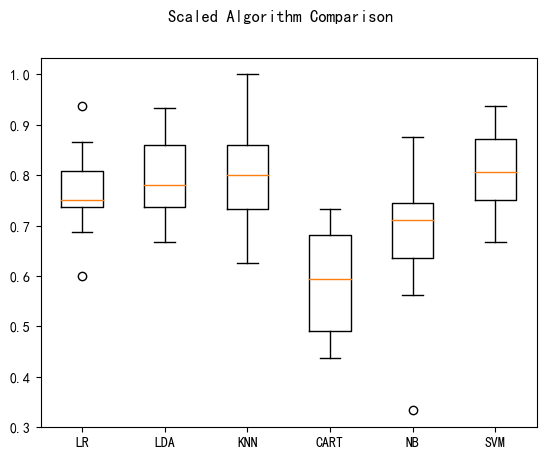

In [10]:
# 评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

## 调整模型参数
使用网格搜索的方式处理超参数

In [11]:
from sklearn.model_selection import GridSearchCV

### KNN算法调参

In [12]:
# 调参改进算法 - KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]} # 之前没有写过，会有默认值吗？
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

最优：0.8408333333333333 使用{'n_neighbors': 1}
0.840833 (0.074508) with {'n_neighbors': 1}
0.800417 (0.073726) with {'n_neighbors': 3}
0.794583 (0.104915) with {'n_neighbors': 5}
0.735833 (0.114764) with {'n_neighbors': 7}
0.742917 (0.099636) with {'n_neighbors': 9}
0.711250 (0.071615) with {'n_neighbors': 11}
0.722917 (0.086286) with {'n_neighbors': 13}
0.697500 (0.084578) with {'n_neighbors': 15}
0.679167 (0.094978) with {'n_neighbors': 17}
0.665833 (0.096911) with {'n_neighbors': 19}
0.685833 (0.083774) with {'n_neighbors': 21}


### SVM算法调参

In [13]:
# 调参改进算法 - SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train).astype(float)
param_grid = {}
param_grid['C'] = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
param_grid['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

最优：0.8204166666666666 使用{'C': 1.7, 'kernel': 'rbf'}
0.750000 (0.109163) with {'C': 0.1, 'kernel': 'linear'}
0.596250 (0.137228) with {'C': 0.1, 'kernel': 'poly'}
0.491667 (0.120934) with {'C': 0.1, 'kernel': 'rbf'}
0.704167 (0.177541) with {'C': 0.1, 'kernel': 'sigmoid'}
0.755833 (0.103266) with {'C': 0.3, 'kernel': 'linear'}
0.665833 (0.171166) with {'C': 0.3, 'kernel': 'poly'}
0.712083 (0.116435) with {'C': 0.3, 'kernel': 'rbf'}
0.750833 (0.121704) with {'C': 0.3, 'kernel': 'sigmoid'}
0.749583 (0.110420) with {'C': 0.5, 'kernel': 'linear'}
0.728750 (0.159006) with {'C': 0.5, 'kernel': 'poly'}
0.756667 (0.094707) with {'C': 0.5, 'kernel': 'rbf'}
0.763333 (0.099195) with {'C': 0.5, 'kernel': 'sigmoid'}
0.762083 (0.109757) with {'C': 0.7, 'kernel': 'linear'}
0.761250 (0.149293) with {'C': 0.7, 'kernel': 'poly'}
0.801667 (0.101211) with {'C': 0.7, 'kernel': 'rbf'}
0.763750 (0.105427) with {'C': 0.7, 'kernel': 'sigmoid'}
0.756667 (0.125100) with {'C': 0.9, 'kernel': 'linear'}
0.761667 (0.

# 5.优化模型
## 使用集成算法
## 集成算法模型构建

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# 集成算法
ensembles = {}

ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestClassifier())])
ensembles['ScaledET'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesClassifier())])

results = []

for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

ScaledAB: 0.813750 (0.054869)
ScaledGBM: 0.808750 (0.084686)
ScaledRF: 0.847500 (0.092369)
ScaledET: 0.833333 (0.114519)


## 集成算法箱线图

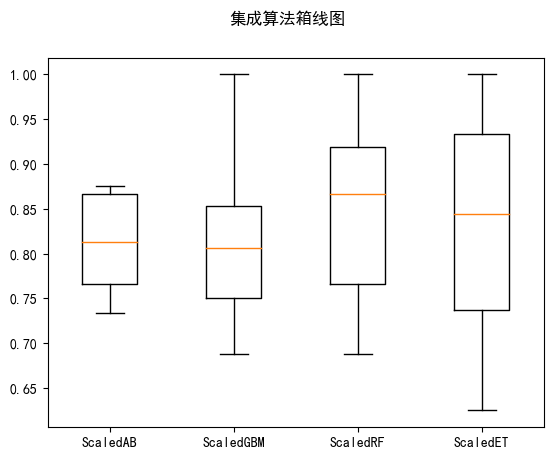

In [15]:
# 集成算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('集成算法箱线图')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys())
pyplot.show()

## 集成算法调参

### GBM算法调参

In [16]:
# 集成算法GBM - 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优：0.8408333333333333 使用{'n_estimators': 700}


### 极端决策树算法调参

In [17]:
# 集成算法ETR - 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = ExtraTreesClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优：0.8604166666666668 使用{'n_estimators': 800}


# 6.确定模型

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report # 周志华《机器学习》，第1、2章
# 模型最终化
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5, kernel='rbf')
model.fit(X=rescaledX, y=Y_train)

# 评估模型
rescaled_validationX = scaler.transform(X_validation)
predictions = model.predict(rescaled_validationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9038461538461539
[[27  3]
 [ 2 20]]
              precision    recall  f1-score   support

           M       0.93      0.90      0.92        30
           R       0.87      0.91      0.89        22

    accuracy                           0.90        52
   macro avg       0.90      0.90      0.90        52
weighted avg       0.91      0.90      0.90        52

